# Visualization for VAE baseline and MAE

Visualization of mask and reconstruction


## Download dataest

If you have downloaded COCO 2017 dataset, please ignore this cell.

In [ ]:
# COCO: trainval2017, val2017
# ! data_dir='data'
# ! dataset_dir='coco'
! mkdir -p data/  # if not exsit, create a folder

# annotations
! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
! unzip -o annotations_trainval2017.zip -d data/coco/
! mv data/coco/annotations/ data/coco/ann_trainval2017/

# val set: 5k images
! wget http://images.cocodataset.org/zips/val2017.zip
! unzip -q -o ./val2017.zip -d data/coco/ # no verbose

# training set: 118k images
# ! wget http://images.cocodataset.org/zips/train2017.zip
# ! unzip -q -o ./train2017.zip -d data/coco/ # no verbose

! rm *.zip*

## Misualization of pre-trained MAE

### Check the shapes of MAE decoder' outputs

In [12]:
from transformers import AutoFeatureExtractor, ViTMAEForPreTraining
from PIL import Image
import requests

In [13]:
# transform image to inputs and build the pretrained MAE (with decoder)
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/vit-mae-base")
mae_with_decoder = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

In [14]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
img_inputs = feature_extractor(images=image, return_tensors="pt")

# fit one image into the pretrained MAE
img_outputs = mae_with_decoder(**img_inputs)
img_inputs.keys(), img_outputs.keys()

(dict_keys(['pixel_values']),
 odict_keys(['loss', 'logits', 'mask', 'ids_restore']))

In [15]:
print(f'Shape of outputs')
print(f'MAE input: {img_inputs["pixel_values"].size()}')
print(f"the mask: {img_outputs['mask'].size()}")
print(f"the ids_restore: {img_outputs['ids_restore'].size()}")
print(f"MAE decoder's output (logits): {img_outputs['logits'].size()}")

Shape of outputs
MAE input: torch.Size([1, 3, 224, 224])
the mask: torch.Size([1, 196])
the ids_restore: torch.Size([1, 196])
MAE decoder's output (logits): torch.Size([1, 196, 768])


### Mask visualization for pre-trained MAE

- load pretrained MAE model (with decoder)
- `utils.run_one_img()` support load image from internet or locally

    `run_one_img(url='', img_path='', model=None, verbose=True)`
    - url: str [optional], load an image via this url
    - img_path: str [optional], load an image via this load path
    - Note: url and img_path can't be empty at the same time.
    - model: ViTMAEForPreTraining, pretrained MAE model (with decoder)
    - verbose: bool, if `verbose=True`, print `rec_loss` and the process of making pixel-wise mask and reconstruction


In [16]:
from utils import run_one_img
from params import PRETRAIN_DATASET_PARAMS as PDP
from transformers import ViTMAEForPreTraining

In [17]:
# load pretrained MAE model (with decoder)
pretrained_model = 'facebook/vit-mae-base'
mae_with_decoder = ViTMAEForPreTraining.from_pretrained(pretrained_model)

rec_loss: tensor(0.1867, grad_fn=<DivBackward0>)
patch mask -> unpatch_mask -> pixel mask projection: 
torch.Size([1, 196]) -> torch.Size([1, 196, 768]) -> torch.Size([1, 3, 224, 224])
pred of decoder -> pixel-wise pred: 
torch.Size([1, 196, 768]) -> torch.Size([1, 3, 224, 224])


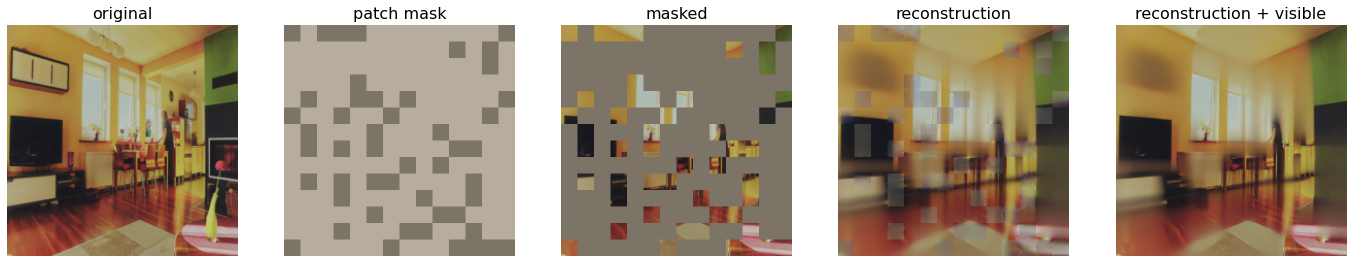

In [18]:
# show mask and reconstruction for one image
url = "http://images.cocodataset.org/val2017/000000000139.jpg"
run_one_img(url=url, model=mae_with_decoder, verbose=True) 

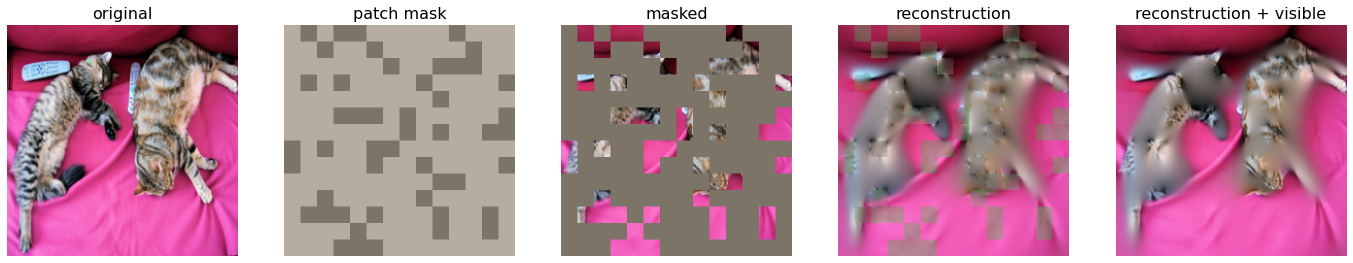

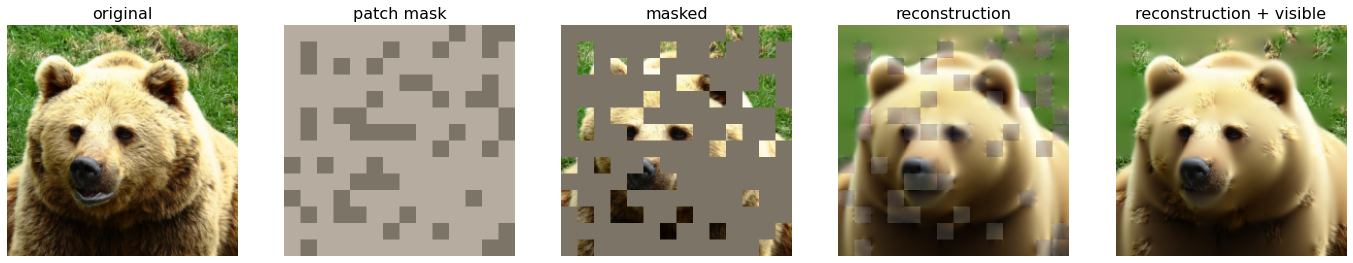

In [19]:
# load image from internet
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
run_one_img(url=url, model=mae_with_decoder, verbose=False)

# NOTE: using img_path requires downloaded COCO 2017 dataset
img_path = "data/coco/val2017/000000000285.jpg"
run_one_img(img_path=img_path, model=mae_with_decoder, verbose=False)

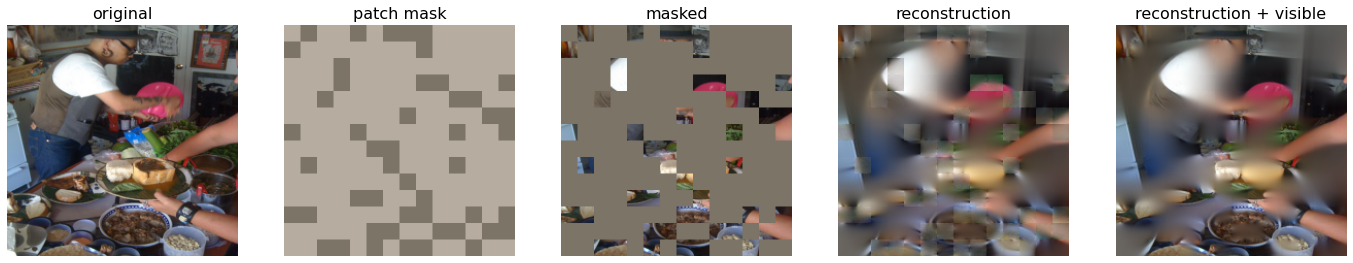

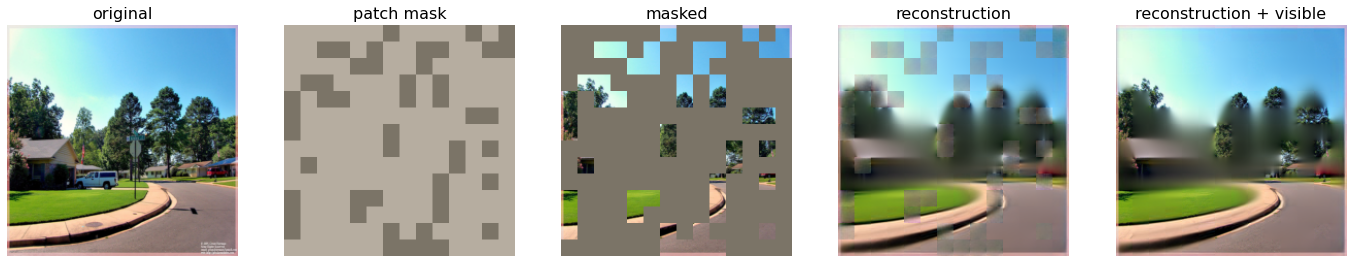

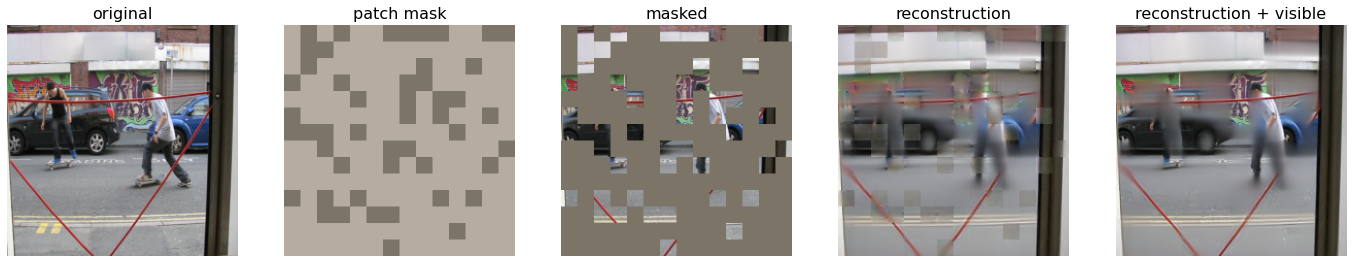

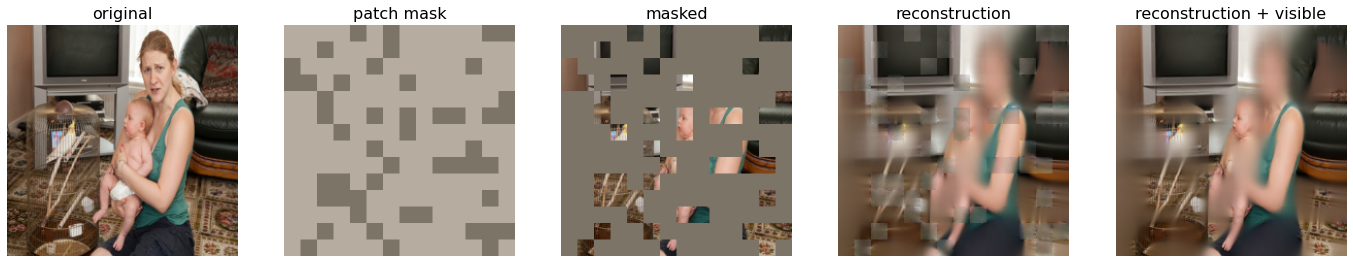

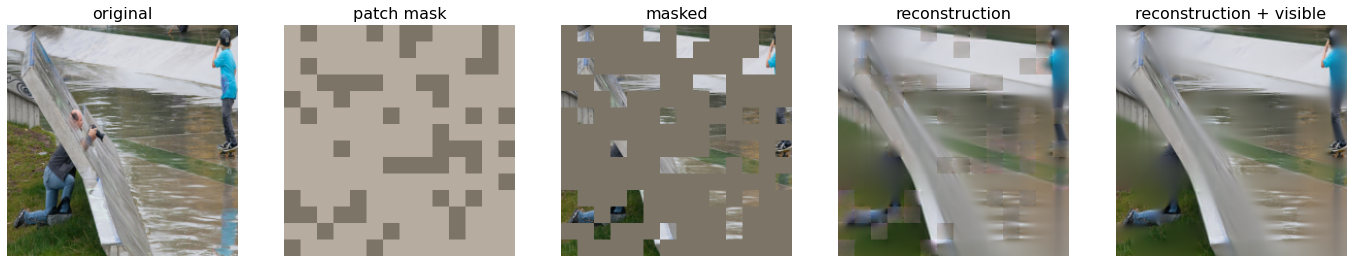

In [20]:
# Iterate local images and show their masks and reconstruction
import os

rootdir = "data/coco/val2017/"
num_images = 5
model = mae_with_decoder
verbose = False

for subdir, dirs, files in os.walk(rootdir):
    for i, file in enumerate(files):
        #print os.path.join(subdir, file)
        img_path = subdir + file
        # print(img_path)
        run_one_img(img_path=img_path, model=model, verbose=verbose)
        if i >= num_images - 1:
            break